In [2]:
# Dependencies
import csv
import matplotlib.pyplot as plt
import requests
import pandas as pd
from config import weather_key

In [3]:
# Save config information.
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"

# Build partial query URL
query_url = f"{url}appid={weather_key}&units={units}&q="

In [9]:
cities = ["Paris", "London", "Oslo", "Beijing", "Toronto,CA", "Moscow,RU", "Melbourne,AU", "Nashville,US"]

# set up lists to hold reponse info
lat = []
temp = []

# Loop through the list of cities and perform a request for data on each
for city in cities:
    response = requests.get(query_url + city).json()
    lat.append(response['coord']['lat'])
    temp.append(response['main']['temp'])

print(f"The latitude information received is: {lat}")
print(f"The temperature information received is: {temp}")

The latitude information received is: [48.86, 51.51, 59.91, 39.91, 43.65, 55.75, -37.81, 36.16]
The temperature information received is: [61.74, 53.42, 50.61, 80.4, 75.81, 56.89, 51.76, 85.95]


In [10]:
# create a data frame from cities, lat, and temp
weather_dict = {
    "city": cities,
    "lat": lat,
    "temp": temp
}
weather_data = pd.DataFrame(weather_dict)
weather_data.head(10)

,city,lat,temp
0,Paris,48.86,61.74
1,London,51.51,53.42
2,Oslo,59.91,50.61
3,Beijing,39.91,80.40
4,"Toronto,CA",43.65,75.81
5,"Moscow,RU",55.75,56.89
6,"Melbourne,AU",-37.81,51.76
7,"Nashville,US",36.16,85.95


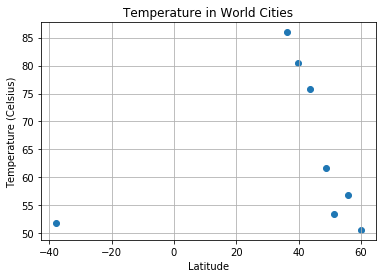

In [11]:
# Build a scatter plot for each data type
plt.scatter(weather_data["lat"], weather_data["temp"], marker="o")

# Incorporate the other graph properties
plt.title("Temperature in World Cities")
plt.ylabel("Temperature (Celsius)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("../Images/TemperatureInWorldCities.png")

# Show plot
plt.show()